In [62]:
import pandas as pd
import os

In [63]:
# List of CSV file names
csv_files = [
    'BaggedTreeClassifier.csv',
    'DecisionTree.csv',
    'Fast Text - Linear Regression.csv',
    'Fast Text - Linear Regression2.csv',
    'Fast Text - train_supervised.csv',
    'Fast Text - train_supervised2.csv',
    'LGBMClassifier.csv',
    'Linear Regression.csv',
    'Logistic Regression.csv',
    'RandomForestClassifier.csv',
    'SVC.csv',
    'Word2Vec - Linear Regression.csv',
    'Word2Vec - Linear Regression2.csv',
    'XGBClassifier.csv'
]

In [64]:
# Read each CSV file and concatenate into one DataFrame
dfs = []
for file in csv_files:
    df = pd.read_csv(os.path.join('', file))
    dfs.append(df)

In [65]:
# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [66]:
# Replace NaN with 'None' in the 'Data Balancing Technique' column
combined_df['data balancing technique'] = combined_df['data balancing technique'].fillna('None')

In [67]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [68]:
# Display the combined DataFrame
combined_df

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,DF5,BaggedTreeClassifier,None,1,0.847222,0.642857,0.859155,0.620690,0.853147,0.631579,71.0,29.0,61,11,18,10
1,DF5,BaggedTreeClassifier,None,2,0.769231,0.545455,0.857143,0.400000,0.810811,0.461538,70.0,30.0,60,18,12,10
2,DF5,BaggedTreeClassifier,None,3,0.719512,0.500000,0.867647,0.281250,0.786667,0.360000,68.0,32.0,59,23,9,9
3,DF5,BaggedTreeClassifier,None,4,0.779070,0.571429,0.917808,0.296296,0.842767,0.390244,73.0,27.0,67,19,8,6
4,DF5,BaggedTreeClassifier,None,5,0.750000,0.392857,0.760563,0.379310,0.755245,0.385965,71.0,29.0,54,18,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,DF5c,XGBClassifier,SMOTETomek,5,0.753247,0.500000,0.773333,0.472222,0.763158,0.485714,75.0,36.0,58,19,17,17
1130,DF5c,XGBClassifier,SMOTETomek,6,0.773810,0.740741,0.902778,0.512821,0.833333,0.606061,72.0,39.0,65,19,20,7
1131,DF5c,XGBClassifier,SMOTETomek,7,0.871429,0.487805,0.743902,0.689655,0.802632,0.571429,82.0,29.0,61,9,20,21
1132,DF5c,XGBClassifier,SMOTETomek,8,0.875000,0.612903,0.853659,0.655172,0.864198,0.633333,82.0,29.0,70,10,19,12


## Aggragating the median of the metrics grouped by the model

In [69]:
df1 = combined_df.copy()

In [70]:
df1.drop(columns=['fold','dataset','data balancing technique'], inplace=True)

In [71]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
median_metrics = df1.groupby(['model']).median().reset_index()

In [72]:
median_metrics

,model,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,0.800000,0.537523,0.817542,0.521739,0.800000,0.523834,70.5,29.5,56.0,14.0,15.0,13.0
1,DecisionTreeClassifier,0.781929,0.450806,0.720588,0.520000,0.744186,0.480506,70.5,29.5,50.0,14.0,16.0,19.0
2,Fast Text - Linear Regression,0.702941,0.632500,0.724138,0.616848,0.706787,0.608338,32.0,29.5,22.0,12.0,17.0,10.0
3,Fast Text - train_supervised,0.822212,0.536150,0.800000,0.565942,0.798811,0.532292,70.5,29.5,55.0,12.0,17.0,14.0
4,LGBMClassifier,0.825742,0.576923,0.806452,0.585770,0.812265,0.577024,70.5,29.5,55.0,12.0,17.0,14.0
5,Linear Regression,0.833333,0.544466,0.750000,0.657519,0.800000,0.584615,71.0,30.0,54.0,11.0,20.0,17.5
6,Logistic Regression,0.823571,0.533399,0.760563,0.636667,0.794118,0.571429,70.5,29.5,54.0,11.0,18.0,17.0
7,RandomForestClassifier,0.796245,0.550000,0.830769,0.483598,0.804238,0.521279,70.5,29.5,57.0,15.0,14.5,12.0
8,SVC,0.707317,0.333333,0.760563,0.382554,0.719111,0.350877,70.5,29.5,48.5,18.0,12.0,17.0
9,Word2Vec - Linear Regression,0.734135,0.642857,0.676190,0.659420,0.703846,0.639149,32.0,29.5,21.0,10.0,18.5,10.0


### Standart Deviation

In [73]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
std_metrics = df1.groupby(['model']).std().reset_index()

In [74]:
std_metrics

,model,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,0.053095,0.089519,0.075343,0.110990,0.049342,0.075656,4.284033,4.284033,6.842235,4.092214,3.930916,5.121322
1,DecisionTreeClassifier,0.049239,0.088781,0.071327,0.110585,0.047781,0.084376,4.284033,4.284033,5.970463,3.678654,4.138736,5.092361
2,Fast Text - Linear Regression,0.081233,0.102034,0.154119,0.180104,0.103745,0.127072,19.495907,4.302148,19.802093,5.534152,6.102213,4.865275
3,Fast Text - train_supervised,0.053282,0.102767,0.098896,0.125617,0.059215,0.078204,4.302148,4.302148,7.827573,4.271671,4.552115,6.723326
4,LGBMClassifier,0.053678,0.098785,0.083075,0.108381,0.052733,0.074699,4.284033,4.284033,6.903821,3.981435,3.857075,5.812090
5,Linear Regression,0.052306,0.088824,0.078709,0.129592,0.042213,0.069736,5.135679,4.462083,6.604205,4.149321,4.969442,5.721708
6,Logistic Regression,0.049790,0.099469,0.085001,0.128219,0.045851,0.078340,4.284033,4.284033,6.656771,4.091256,4.686712,6.080137
7,RandomForestClassifier,0.055106,0.100622,0.079982,0.139562,0.044935,0.091240,4.284033,4.284033,6.892324,4.908804,4.621349,5.552645
8,SVC,0.204198,0.182944,0.303230,0.282810,0.238876,0.140417,4.284033,4.284033,21.398380,8.798141,8.821987,21.414476
9,Word2Vec - Linear Regression,0.085008,0.095275,0.135893,0.181191,0.092089,0.130499,19.495907,4.302148,19.347813,6.179495,5.916056,4.668563


In [75]:
import matplotlib.pyplot as plt
import numpy as np

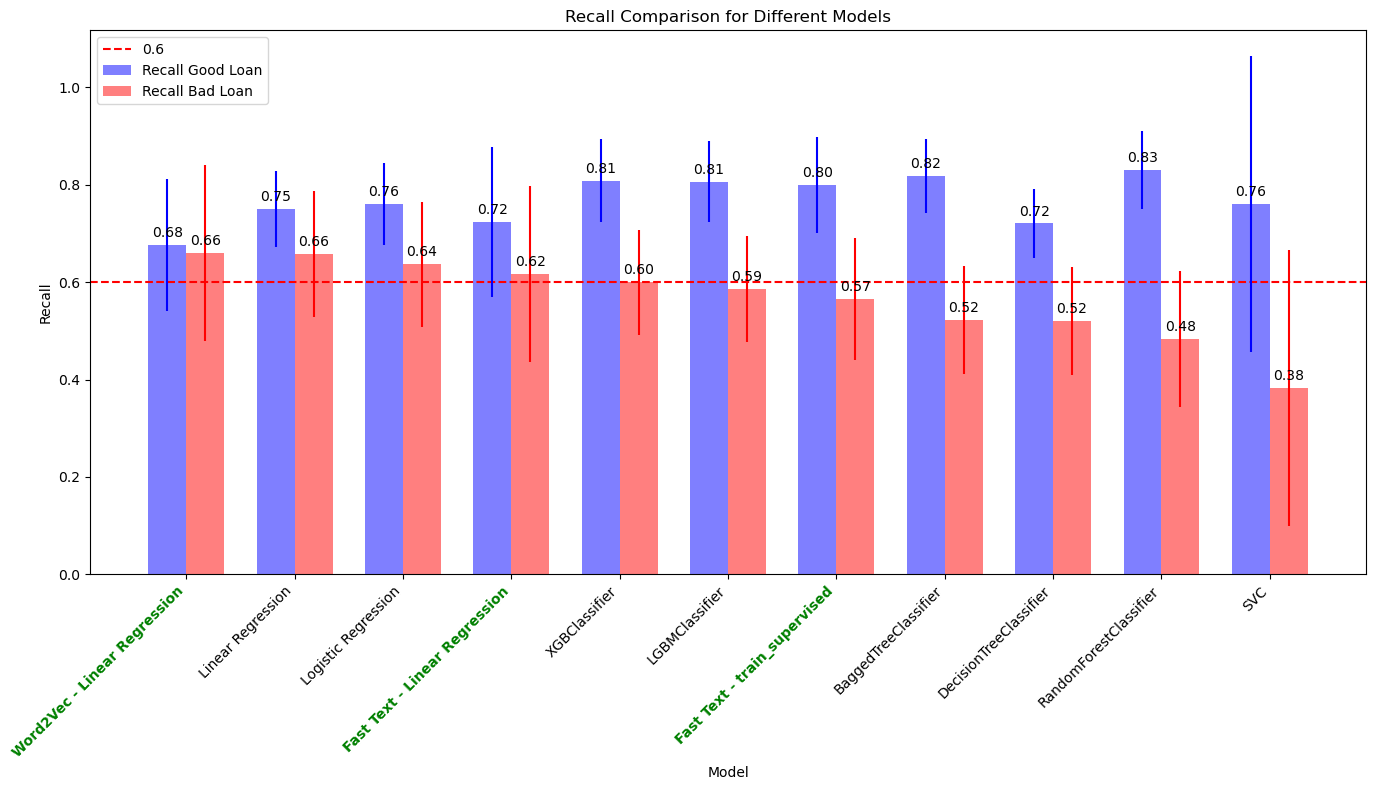

In [76]:
# Sort the DataFrame by recall_2
median_metrics_sorted = median_metrics.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot recall_1
plt.bar(x - bar_width/2, median_metrics_sorted['recall_1'], bar_width, color='b', alpha=0.5, label='Recall Good Loan')

# Plot recall_2
plt.bar(x + bar_width/2, median_metrics_sorted['recall_2'], bar_width, color='r', alpha=0.5, label='Recall Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_recall_1 = std_metrics['recall_1'].loc[median_metrics_sorted.index]
std_dev_recall_2 = std_metrics['recall_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['recall_1'], yerr=std_dev_recall_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['recall_2'], yerr=std_dev_recall_2, fmt='none', color='r')

# Set x-axis labels
plt.xticks(x, median_metrics_sorted.model, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [0, 3, 6]

# Bold and/or color specific tick labels
for i, tick_label in enumerate(plt.gca().get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['recall_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['recall_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

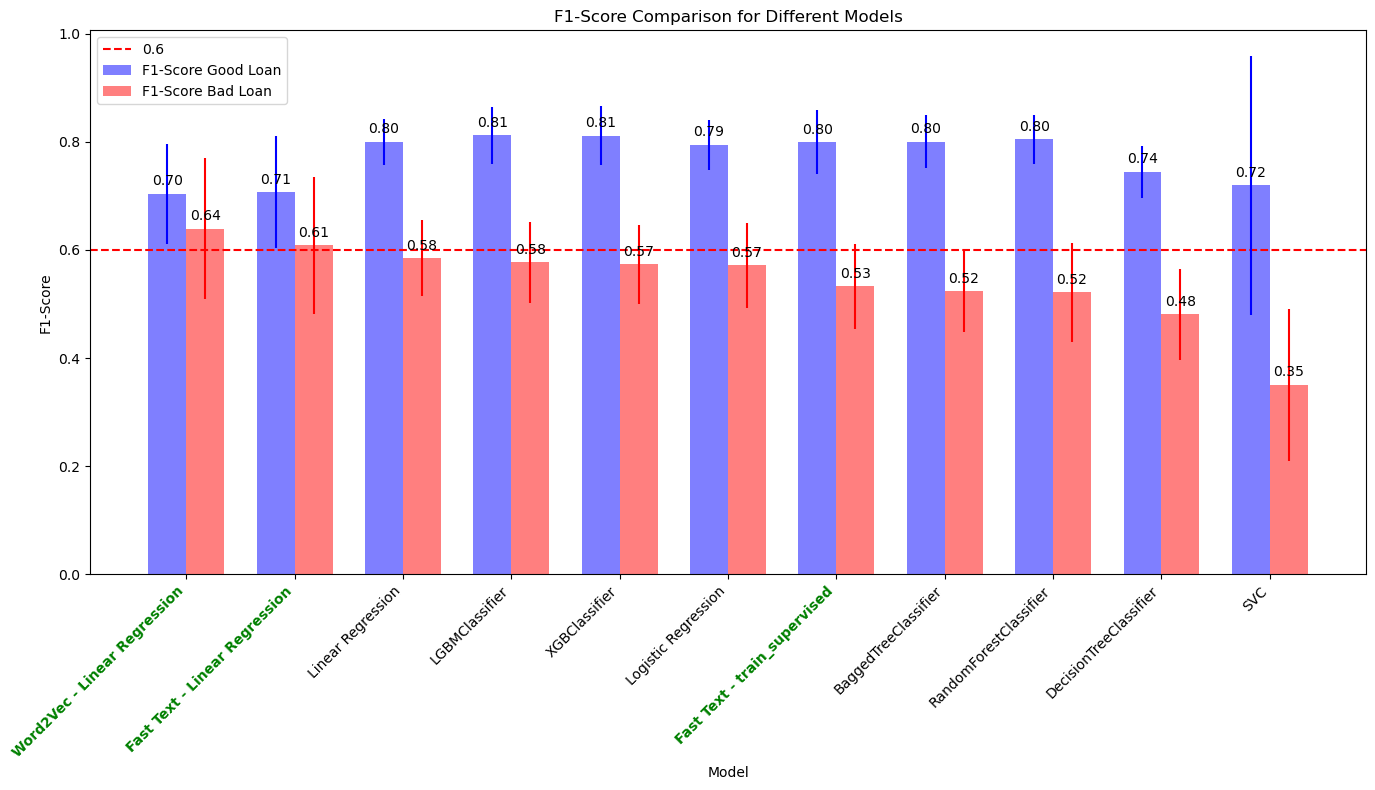

In [77]:
# Sort the DataFrame by recall_2
median_metrics_sorted = median_metrics.sort_values(by='f1-score_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot f1-score_1
plt.bar(x - bar_width/2, median_metrics_sorted['f1-score_1'], bar_width, color='b', alpha=0.5, label='F1-Score Good Loan')

# Plot f1-score_2
plt.bar(x + bar_width/2, median_metrics_sorted['f1-score_2'], bar_width, color='r', alpha=0.5, label='F1-Score Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_f1_score_1 = std_metrics['f1-score_1'].loc[median_metrics_sorted.index]
std_dev_f1_score_2 = std_metrics['f1-score_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['f1-score_1'], yerr=std_dev_f1_score_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['f1-score_2'], yerr=std_dev_f1_score_2, fmt='none', color='r')

# Set x-axis labels
plt.xticks(x, median_metrics_sorted.model, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [0, 1, 6]

# Bold and/or color specific tick labels
for i, tick_label in enumerate(plt.gca().get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['f1-score_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['f1-score_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## Aggragating the median of the metrics grouped by the model and data balancing method

In [78]:
df2 = combined_df.copy()

In [79]:
df2.drop(columns=['fold','dataset'], inplace=True)

In [80]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
mean_metrics = df2.groupby(['model', 'data balancing technique']).median().reset_index()

# Drop the 'fold' column as it's not needed for the mean calculation
#mean_metrics.drop(columns=['fold','dataset'], inplace=True) #,'dataset'
#print(mean_metrics)

In [82]:
mean_metrics.head(2)

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,None,0.778424,0.581169,0.876620,0.397368,0.832774,0.476671,70.5,29.5,61.5,17.5,13.0,9.0
1,BaggedTreeClassifier,Random Over Sampler,0.790470,0.571429,0.844012,0.491379,0.817993,0.495902,70.5,29.5,60.0,15.0,14.0,10.5


In [83]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
std_metrics1 = df2.groupby(['model', 'data balancing technique']).std().reset_index()

In [84]:
std_metrics1.head(2)

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,BaggedTreeClassifier,None,0.047438,0.106931,0.044620,0.091583,0.038225,0.088860,4.376973,4.376973,5.130918,3.739899,3.290737,3.147263
1,BaggedTreeClassifier,Random Over Sampler,0.055744,0.073631,0.051184,0.083015,0.044373,0.064686,4.376973,4.376973,5.689094,4.223680,2.523052,3.363504


In [85]:
import seaborn as sns

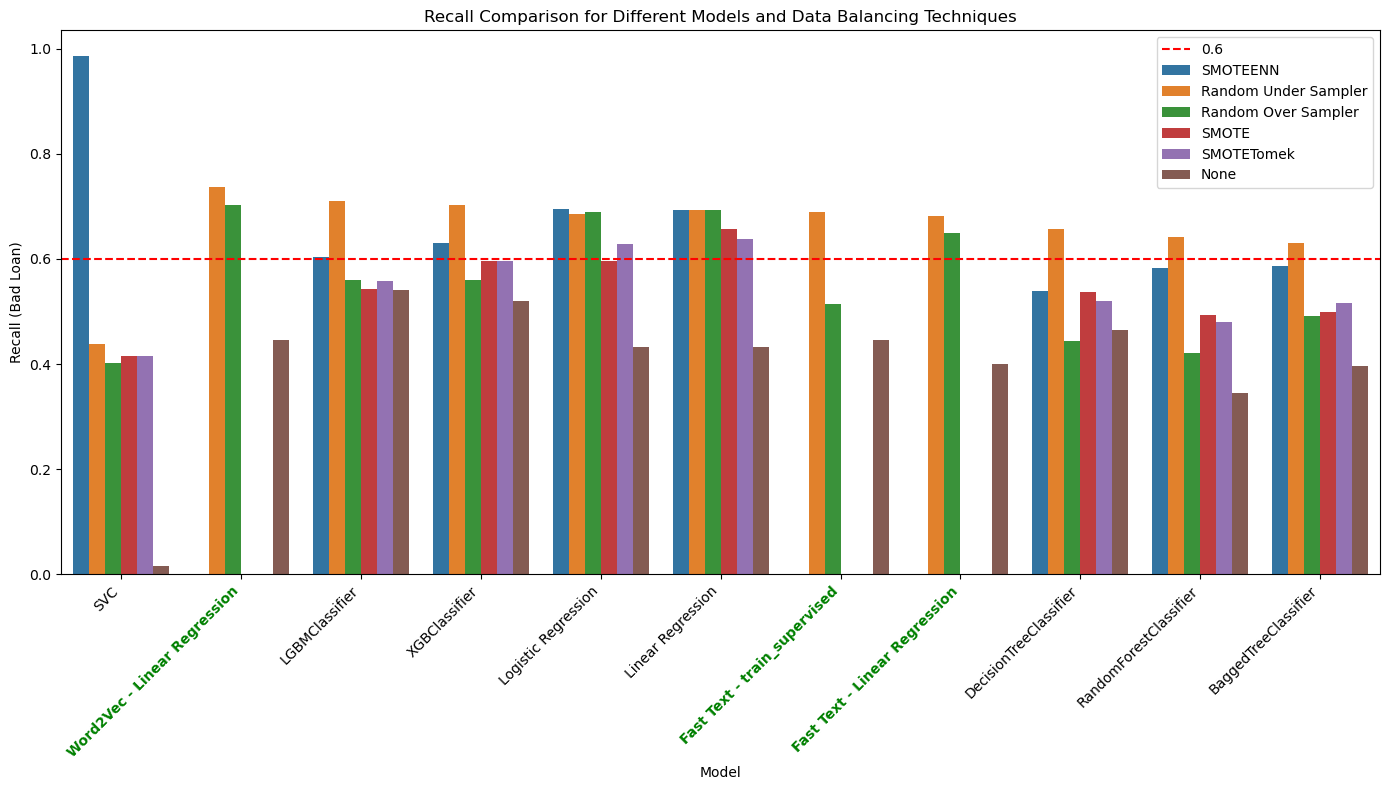

In [86]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = mean_metrics.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.title('Recall Comparison for Different Models and Data Balancing Techniques')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [1, 6, 7]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Show legend on the top left corner
plt.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

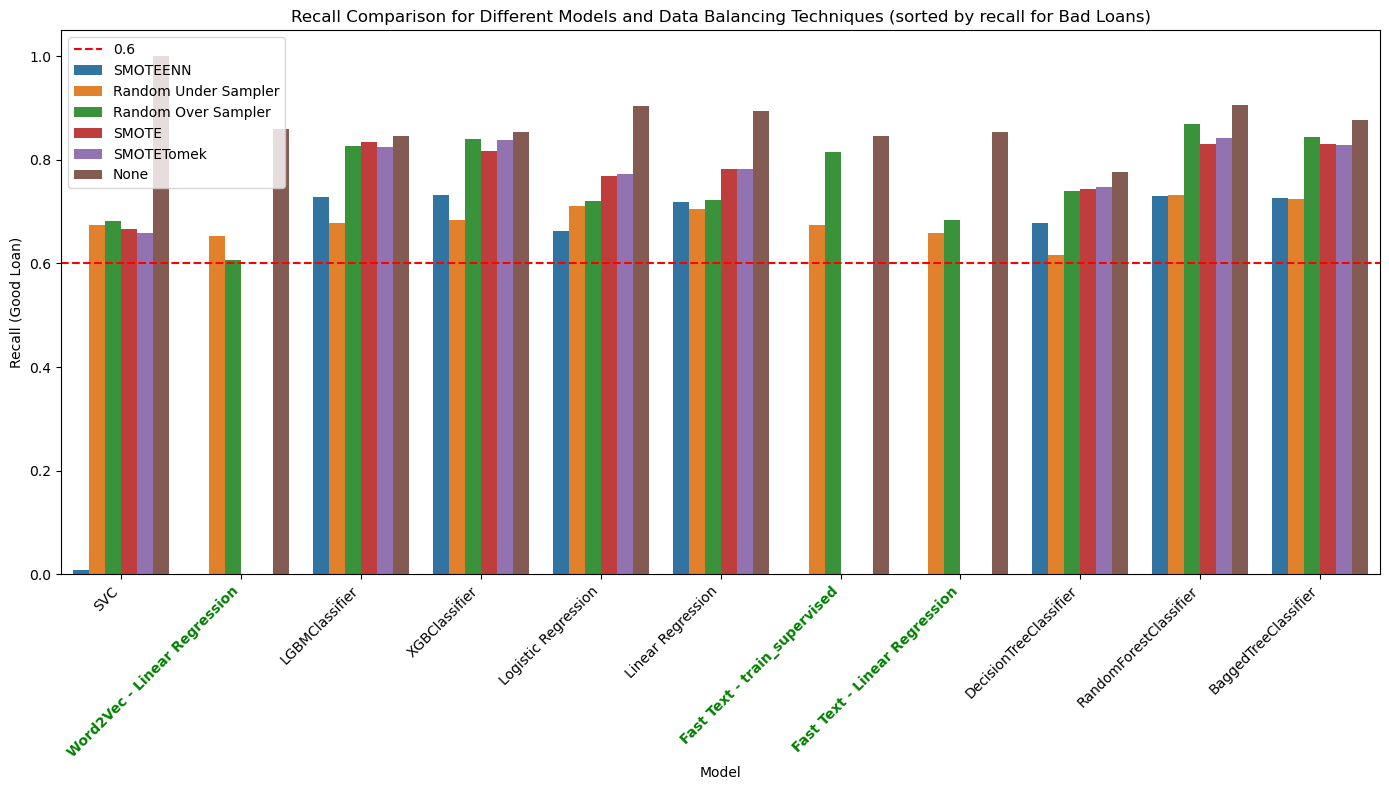

In [87]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = mean_metrics.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_1', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Good Loan)')
plt.title('Recall Comparison for Different Models and Data Balancing Techniques (sorted by recall for Bad Loans)')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [1, 6, 7]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Show legend on the top left corner
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [88]:
## F1-score

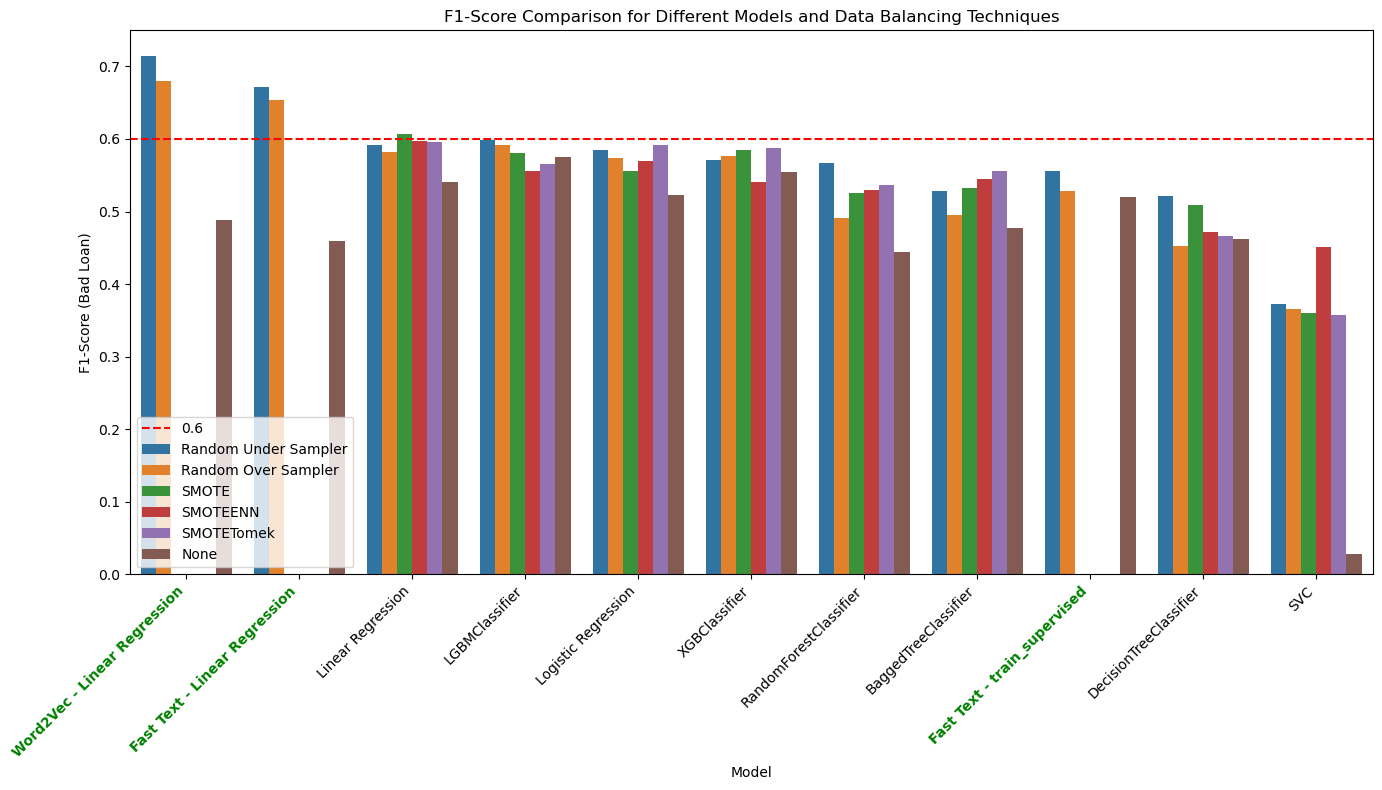

In [89]:
# Sort the DataFrame by f1-score_2
mean_metrics_sorted = mean_metrics.sort_values(by='f1-score_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score (Bad Loan)')
plt.title('F1-Score Comparison for Different Models and Data Balancing Techniques')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Highlight specific models on the x-axis
highlighted_indices = [0, 1, 8]  # Adjust indices as needed
for i, tick_label in enumerate(ax.get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Show legend on the top left corner
plt.legend(loc='lower left')

# Show plot
plt.tight_layout()
plt.show()

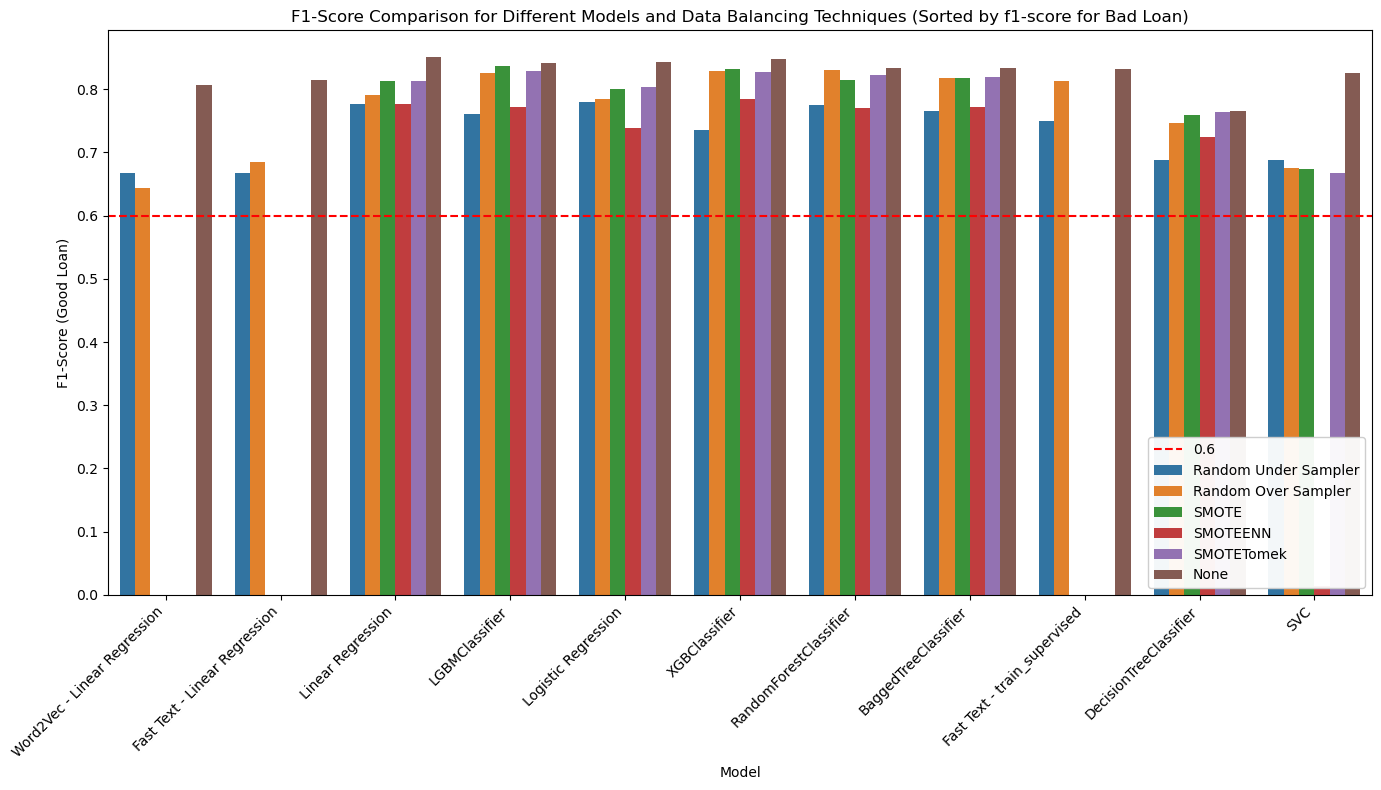

In [90]:
# Sort the DataFrame by f1-score_2
mean_metrics_sorted = mean_metrics.sort_values(by='f1-score_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the barplot
ax = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_1', hue='data balancing technique')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-Score (Good Loan)')
plt.title('F1-Score Comparison for Different Models and Data Balancing Techniques (Sorted by f1-score for Bad Loan)')

# Tilt the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Move legend to the bottom right corner with less transparent background
plt.legend(loc='lower right', framealpha=0.95)

# Show plot
plt.tight_layout()
plt.show()

## Focusing on the Word Embedding models and the Databalancing

In [92]:
df3 = df2[(df2['model'].isin(['Fast Text - Linear Regression', 'Fast Text - train_supervised', 'Word2Vec - Linear Regression']))] #& (df2['data balancing technique'] != 'None')

In [95]:
df3.head(2)

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
240,Fast Text - Linear Regression,None,0.828571,0.566667,0.816901,0.586207,0.822695,0.576271,71.0,29.0,58,12,17,13
241,Fast Text - Linear Regression,None,0.797101,0.516129,0.785714,0.533333,0.791367,0.524590,70.0,30.0,55,14,16,15


In [96]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df3_median = df3.groupby(['model', 'data balancing technique']).median().reset_index()

In [97]:
df3_median

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,Fast Text - Linear Regression,None,0.771282,0.545455,0.853137,0.400000,0.814145,0.459936,70.5,29.5,61.0,18.0,12.0,10.5
1,Fast Text - Linear Regression,Random Over Sampler,0.647516,0.682857,0.684828,0.650000,0.684164,0.653706,29.5,29.5,20.0,10.5,20.5,9.0
2,Fast Text - Linear Regression,Random Under Sampler,0.677083,0.666667,0.658036,0.681159,0.666667,0.671795,29.5,29.5,18.5,9.0,20.5,9.5
3,Fast Text - train_supervised,None,0.810167,0.614144,0.846154,0.446360,0.832185,0.519965,70.5,29.5,59.5,15.0,15.0,10.0
4,Fast Text - train_supervised,Random Over Sampler,0.818829,0.557527,0.816143,0.514286,0.812737,0.528783,70.5,29.5,58.0,13.0,16.0,13.0
5,Fast Text - train_supervised,Random Under Sampler,0.835889,0.467252,0.673742,0.688578,0.750184,0.555362,70.5,29.5,48.5,9.0,20.5,23.5
6,Word2Vec - Linear Regression,None,0.791186,0.560386,0.859155,0.445238,0.806771,0.487877,70.5,29.5,59.0,17.0,13.0,10.0
7,Word2Vec - Linear Regression,Random Over Sampler,0.681818,0.649554,0.606979,0.701970,0.643582,0.680556,29.5,29.5,18.5,8.5,22.0,11.0
8,Word2Vec - Linear Regression,Random Under Sampler,0.722069,0.666667,0.653673,0.737069,0.666667,0.714046,29.5,29.5,18.5,7.5,22.0,9.5


In [32]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df3_std = df3.groupby(['model', 'data balancing technique']).std().reset_index()

In [33]:
df3_median

,model,data balancing technique,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,Fast Text - Linear Regression,None,0.771282,0.545455,0.853137,0.400000,0.814145,0.459936,70.5,29.5,61.0,18.0,12.0,10.5
1,Fast Text - Linear Regression,Random Over Sampler,0.647516,0.682857,0.684828,0.650000,0.684164,0.653706,29.5,29.5,20.0,10.5,20.5,9.0
2,Fast Text - Linear Regression,Random Under Sampler,0.677083,0.666667,0.658036,0.681159,0.666667,0.671795,29.5,29.5,18.5,9.0,20.5,9.5
3,Fast Text - train_supervised,None,0.810167,0.614144,0.846154,0.446360,0.832185,0.519965,70.5,29.5,59.5,15.0,15.0,10.0
4,Fast Text - train_supervised,Random Over Sampler,0.818829,0.557527,0.816143,0.514286,0.812737,0.528783,70.5,29.5,58.0,13.0,16.0,13.0
5,Fast Text - train_supervised,Random Under Sampler,0.835889,0.467252,0.673742,0.688578,0.750184,0.555362,70.5,29.5,48.5,9.0,20.5,23.5
6,Word2Vec - Linear Regression,None,0.791186,0.560386,0.859155,0.445238,0.806771,0.487877,70.5,29.5,59.0,17.0,13.0,10.0
7,Word2Vec - Linear Regression,Random Over Sampler,0.681818,0.649554,0.606979,0.701970,0.643582,0.680556,29.5,29.5,18.5,8.5,22.0,11.0
8,Word2Vec - Linear Regression,Random Under Sampler,0.722069,0.666667,0.653673,0.737069,0.666667,0.714046,29.5,29.5,18.5,7.5,22.0,9.5


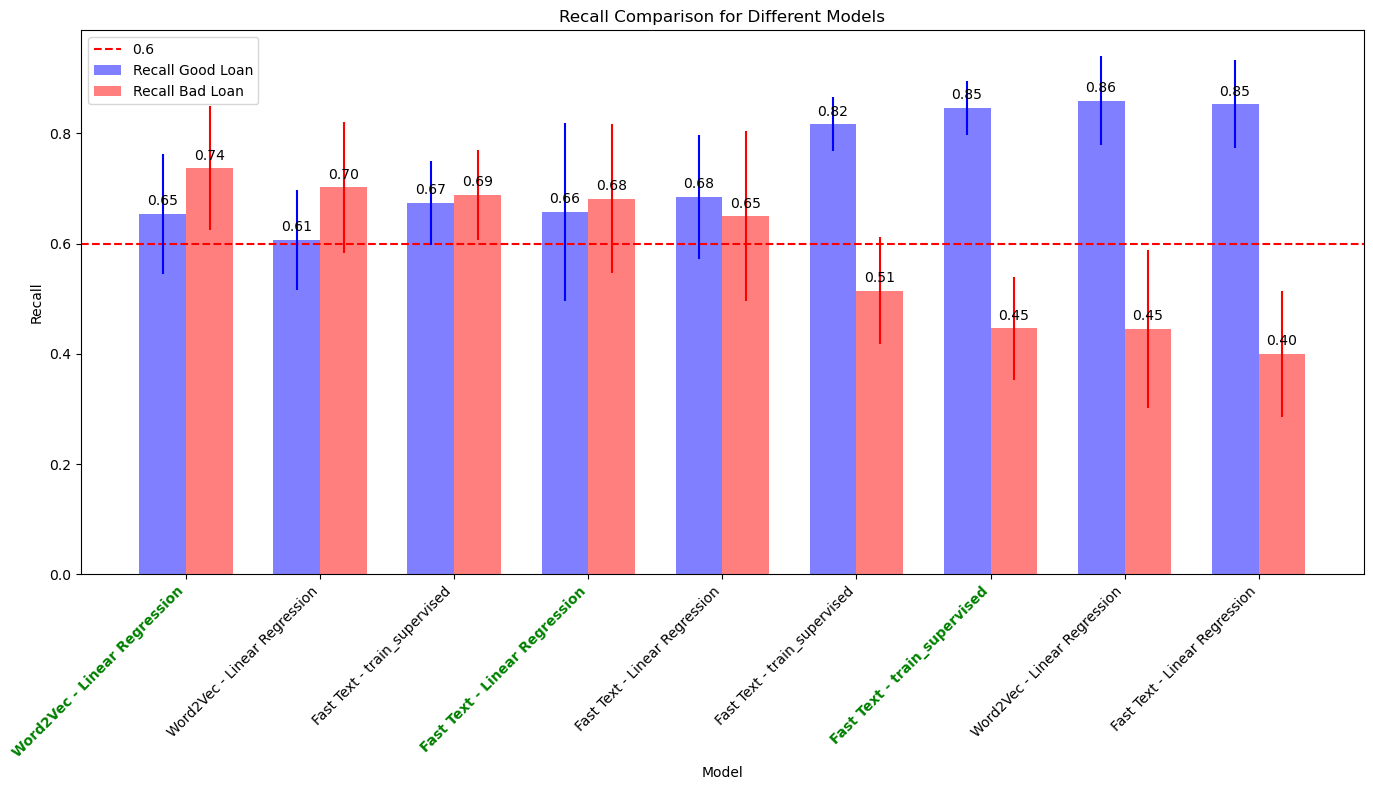

In [34]:
# Sort the DataFrame by recall_2
median_metrics_sorted = df3_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars based on the sorted DataFrame
x = np.arange(len(median_metrics_sorted.model))

# Plot recall_1
plt.bar(x - bar_width/2, median_metrics_sorted['recall_1'], bar_width, color='b', alpha=0.5, label='Recall Good Loan')

# Plot recall_2
plt.bar(x + bar_width/2, median_metrics_sorted['recall_2'], bar_width, color='r', alpha=0.5, label='Recall Bad Loan')

# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')

# Calculate error bars for standard deviation
std_dev_recall_1 = df3_std['recall_1'].loc[median_metrics_sorted.index]
std_dev_recall_2 = df3_std['recall_2'].loc[median_metrics_sorted.index]

# Add error bars for standard deviation
plt.errorbar(x - bar_width/2, median_metrics_sorted['recall_1'], yerr=std_dev_recall_1, fmt='none', color='b')
plt.errorbar(x + bar_width/2, median_metrics_sorted['recall_2'], yerr=std_dev_recall_2, fmt='none', color='r')

# Set x-axis labels
plt.xticks(x, median_metrics_sorted.model, rotation=45, ha='right')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison for Different Models')

# Highlight specific values on the x-axis
highlighted_indices = [0, 3, 6]

# Bold and/or color specific tick labels
for i, tick_label in enumerate(plt.gca().get_xticklabels()):
    if i in highlighted_indices:
        tick_label.set_fontweight('bold')
        tick_label.set_color('green')

# Add values on top of the bars
for i, value in enumerate(median_metrics_sorted['recall_1']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')
for i, value in enumerate(median_metrics_sorted['recall_2']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Show legend on the top left corner
plt.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

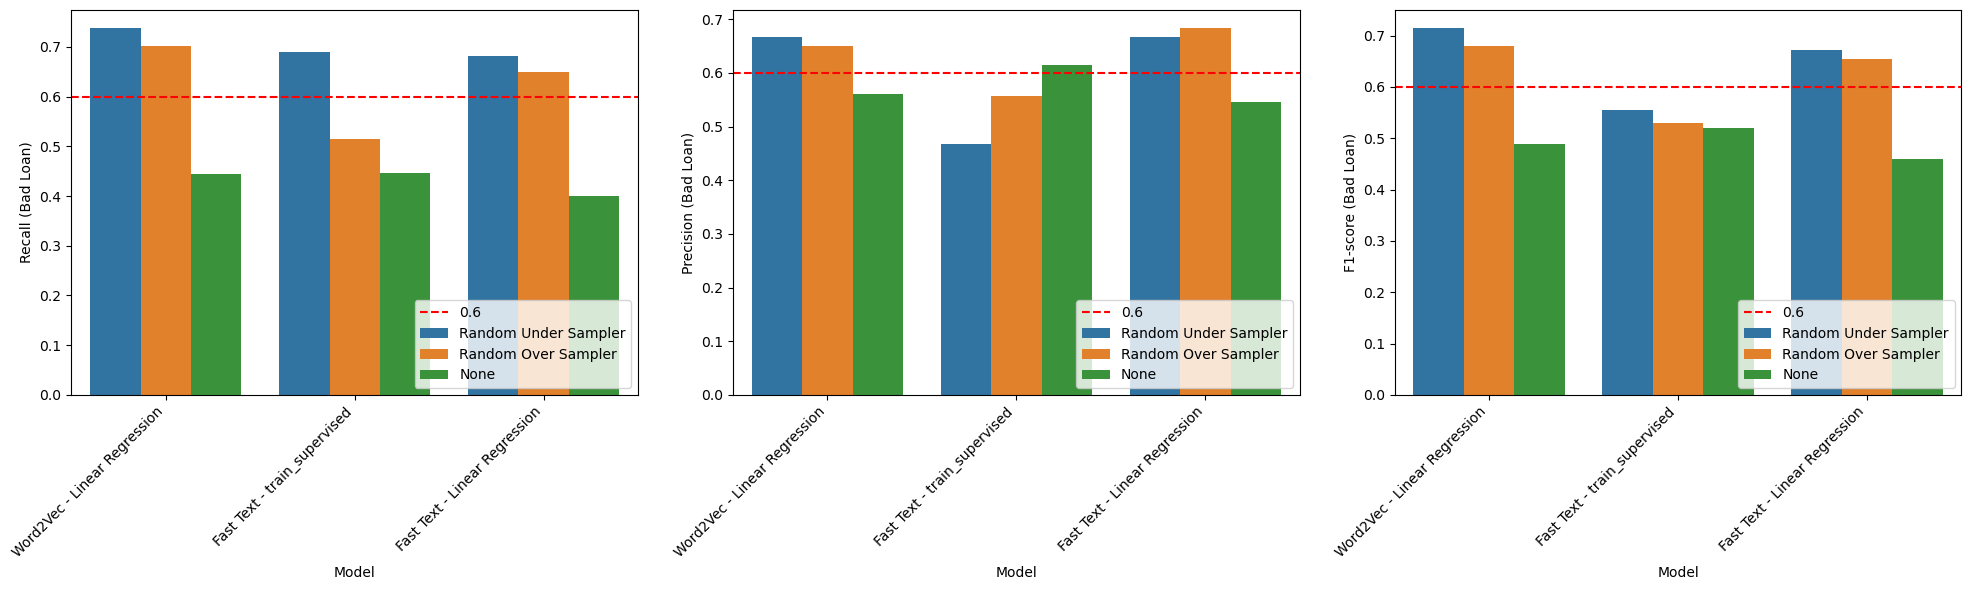

In [35]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = df3_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the barplot for recall_2
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.legend(loc='lower right')

# Plot the barplot for precision_2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=mean_metrics_sorted, x='model', y='precision_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Precision (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for f1-score_2
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-score (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

## Focusing on the difference from the Dataset structure

In [36]:
df4 = combined_df[(combined_df['model'].isin(['Fast Text - Linear Regression', 'Fast Text - train_supervised', 'Word2Vec - Linear Regression']))] #& (df2['data balancing technique'] != 'None')

In [37]:
df4.head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
240,DF7,Fast Text - Linear Regression,None,1,0.828571,0.566667,0.816901,0.586207,0.822695,0.576271,71.0,29.0,58,12,17,13
241,DF7,Fast Text - Linear Regression,None,2,0.797101,0.516129,0.785714,0.533333,0.791367,0.524590,70.0,30.0,55,14,16,15


In [38]:
df4['dataset'].unique()

array(['DF7', 'DF7a', 'DF2', 'DF4'], dtype=object)

In [39]:
#df2 and df7a - Raw Data

In [40]:
#df4 and df7 - Labeled Data

In [50]:
# Replace values in df4
df4['dataset'] = df4['dataset'].replace({'DF2': 'Raw Data', 'DF7a': 'Raw Data', 'DF4': 'Labeled Data', 'DF7': 'Labeled Data'})

C:\Users\albbr\AppData\Local\Temp\ipykernel_24536\2406009374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['dataset'] = df4['dataset'].replace({'DF2': 'Raw Data', 'DF7a': 'Raw Data', 'DF4': 'Labeled Data', 'DF7': 'Labeled Data'})


In [51]:
df4.head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
240,Labeled Data,Fast Text - Linear Regression,None,1,0.828571,0.566667,0.816901,0.586207,0.822695,0.576271,71.0,29.0,58,12,17,13
241,Labeled Data,Fast Text - Linear Regression,None,2,0.797101,0.516129,0.785714,0.533333,0.791367,0.524590,70.0,30.0,55,14,16,15


In [52]:
df4_1 = df4[(df4['dataset'].isin(['Labeled Data']))]

In [53]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_1_median = df4_1.groupby(['dataset','model', 'data balancing technique']).median().reset_index()

In [54]:
df4_1_median

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,Labeled Data,Fast Text - Linear Regression,None,5.5,0.776466,0.563333,0.863286,0.473505,0.819687,0.498659,70.5,29.5,62.0,16.0,13.5,10.0
1,Labeled Data,Fast Text - Linear Regression,Random Over Sampler,5.5,0.647516,0.689011,0.699375,0.703750,0.693093,0.653706,29.5,29.5,21.0,10.0,21.5,9.0
2,Labeled Data,Fast Text - Linear Regression,Random Under Sampler,5.5,0.657658,0.653333,0.597451,0.675412,0.651515,0.654088,29.5,29.5,16.5,8.5,18.0,10.5
3,Labeled Data,Fast Text - train_supervised,None,5.5,0.811905,0.625874,0.849548,0.480952,0.837508,0.527000,70.5,29.5,61.0,14.5,15.5,10.0
4,Labeled Data,Fast Text - train_supervised,Random Over Sampler,5.5,0.827547,0.608586,0.825098,0.542857,0.836397,0.553977,70.5,29.5,58.5,12.0,17.5,12.5
5,Labeled Data,Fast Text - train_supervised,Random Under Sampler,5.5,0.835889,0.515134,0.682184,0.696679,0.767506,0.587084,70.5,29.5,49.5,8.5,21.0,23.5
6,Labeled Data,Word2Vec - Linear Regression,None,5.5,0.823146,0.560386,0.827489,0.593103,0.790575,0.481714,70.5,29.5,55.5,12.0,14.5,11.5
7,Labeled Data,Word2Vec - Linear Regression,Random Over Sampler,5.5,0.683333,0.642857,0.545625,0.728161,0.625926,0.680556,29.5,29.5,17.0,7.5,21.5,13.0
8,Labeled Data,Word2Vec - Linear Regression,Random Under Sampler,5.5,0.743021,0.666667,0.653673,0.762069,0.666667,0.720560,29.5,29.5,17.5,6.0,21.5,9.5


In [55]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_1_std = df4_1.groupby(['dataset','model', 'data balancing technique']).std().reset_index()

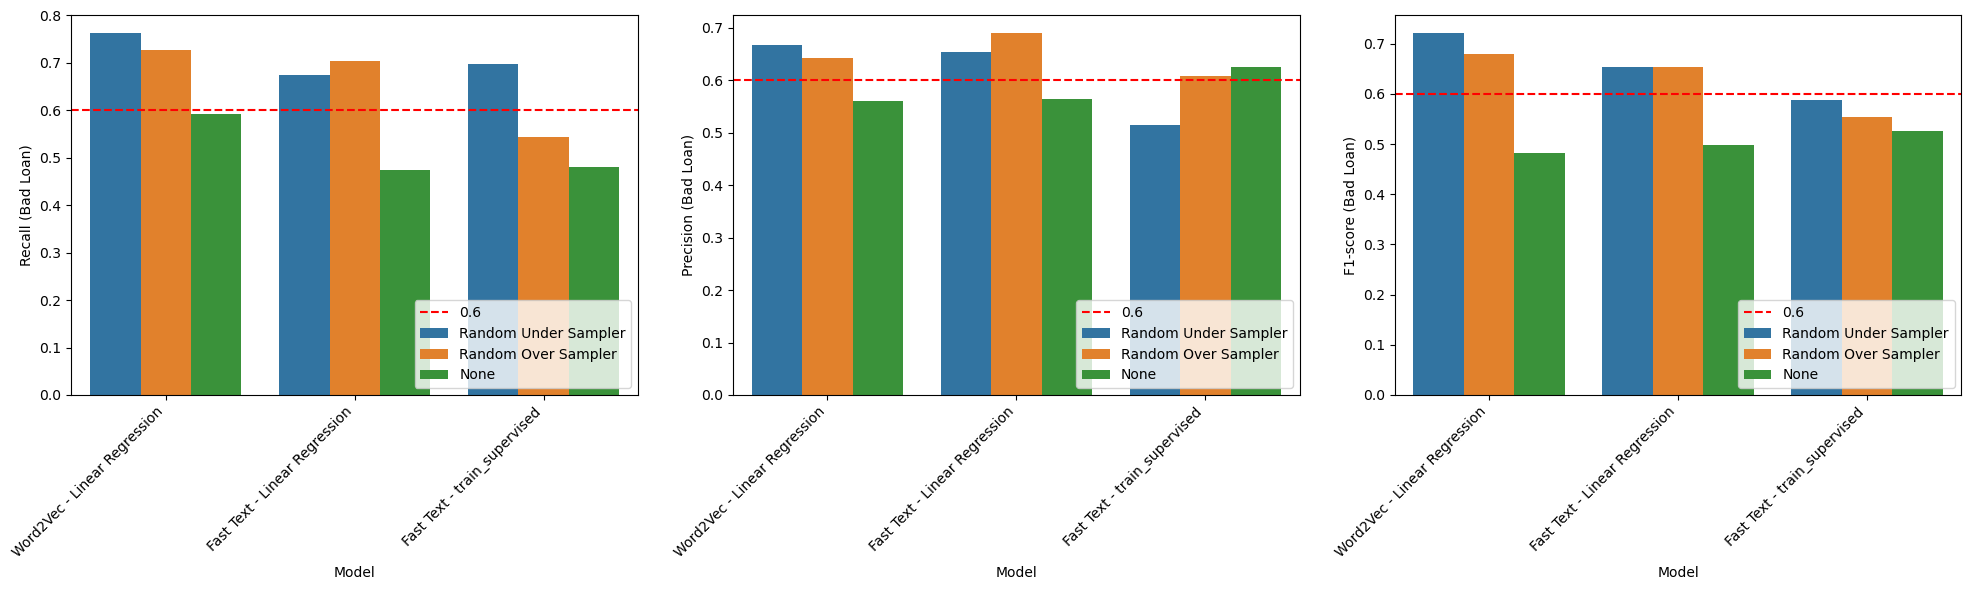

In [56]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = df4_1_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the barplot for recall_2
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for precision_2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=mean_metrics_sorted, x='model', y='precision_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Precision (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for f1-score_2
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-score (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()

In [57]:
df4_2 = df4[(df4['dataset'].isin(['Raw Data']))]

In [58]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_2_median = df4_2.groupby(['dataset','model', 'data balancing technique']).median().reset_index()

In [59]:
# Assuming combined_metrics is your DataFrame containing the mentioned columns
df4_2_std = df4_2.groupby(['dataset','model', 'data balancing technique']).std().reset_index()

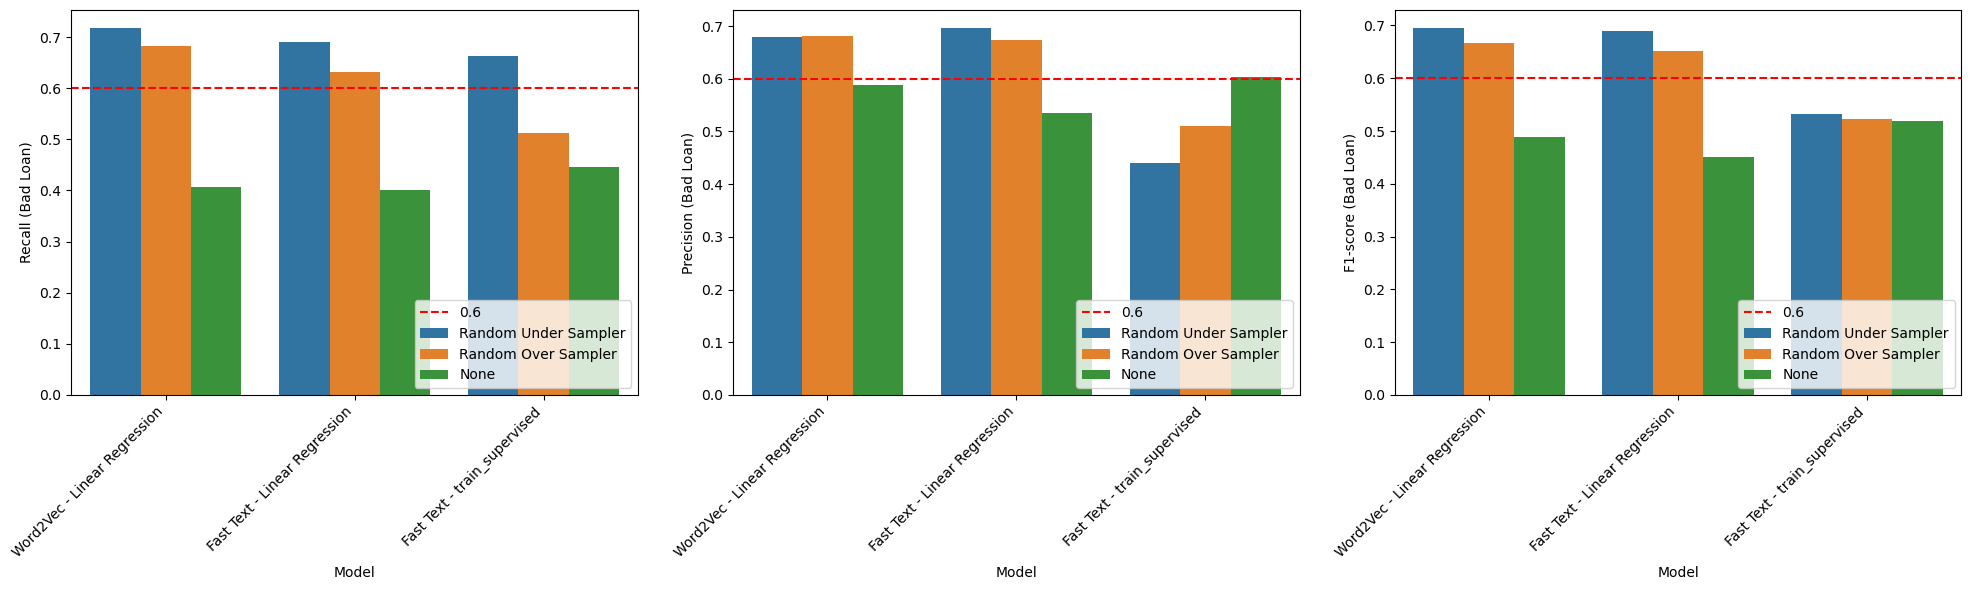

In [60]:
# Sort the DataFrame by recall_2
mean_metrics_sorted = df4_2_median.sort_values(by='recall_2', ascending=False)

# Set the figure size
plt.figure(figsize=(20, 6))

# Plot the barplot for recall_2
plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=mean_metrics_sorted, x='model', y='recall_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Recall (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for precision_2
plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=mean_metrics_sorted, x='model', y='precision_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('Precision (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Plot the barplot for f1-score_2
plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=mean_metrics_sorted, x='model', y='f1-score_2', hue='data balancing technique')
# Draw a horizontal line at y=0.6
plt.axhline(y=0.6, color='r', linestyle='--', label='0.6')
# Set labels and title
plt.xlabel('Model')
plt.ylabel('F1-score (Bad Loan)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show legend on the top left corner
plt.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.show()